In [1]:
import os

base_dir = "data"

classes = os.listdir(base_dir)
print(classes)

for c in classes:
    path = os.path.join(base_dir, c)
    print(c, "->", len(os.listdir(path)), "files")


['forged', 'original']
forged -> 888 files
original -> 86 files


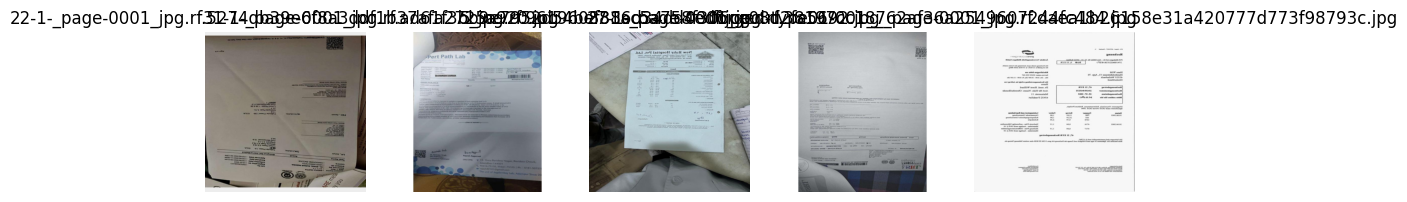

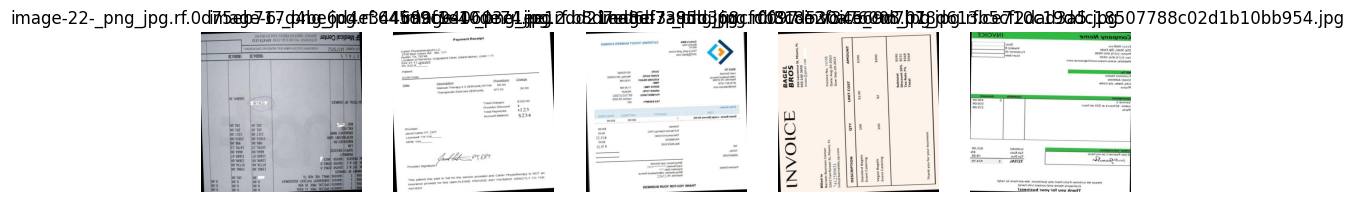

In [2]:
import matplotlib.pyplot as plt
import cv2
import random

def show_samples(folder, n=5):
    files = os.listdir(folder)
    samples = random.sample(files, min(n, len(files)))

    plt.figure(figsize=(12,4))

    for i, f in enumerate(samples):
        img = cv2.imread(os.path.join(folder, f))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f)

    plt.show()

show_samples("data/original")
show_samples("data/forged")


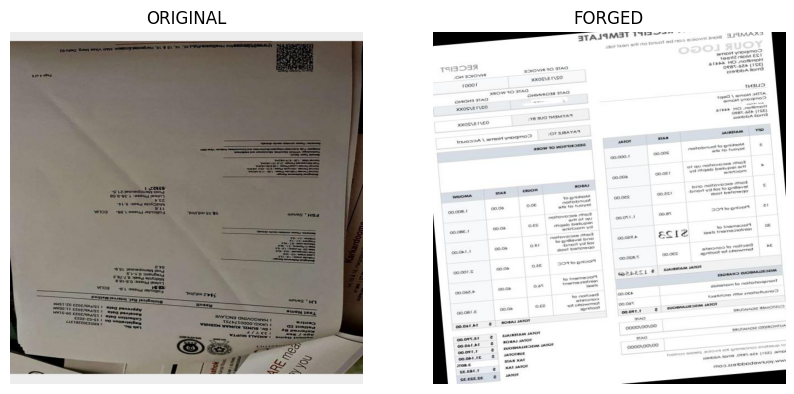

In [3]:
import matplotlib.pyplot as plt
import cv2
import os
import random

base_dir = "data"
classes = ["original", "forged"]

plt.figure(figsize=(10,6))

index = 1
for c in classes:
    folder = os.path.join(base_dir, c)
    file = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, file)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 2, index)
    plt.imshow(img)
    plt.title(c.upper())
    plt.axis("off")

    index += 1

plt.show()

In [4]:
import numpy as np

IMG_SIZE = 256

data = []
labels = []

for c in classes:
    folder = os.path.join(base_dir, c)

    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        img = img / 255.0

        data.append(img)
        labels.append(0 if c == "original" else 1)

data = np.array(data)
labels = np.array(labels)

data.shape, labels.shape

((972, 256, 256), (972,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

X_train.shape, X_test.shape

((777, 256, 256), (195, 256, 256))

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMG_SIZE = 256  # make sure this is the same as your training

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32
)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 775ms/step - accuracy: 0.9086 - loss: 0.4603 - val_accuracy: 0.9128 - val_loss: 0.2398
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 685ms/step - accuracy: 0.9202 - loss: 0.2268 - val_accuracy: 0.9231 - val_loss: 0.2078
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 784ms/step - accuracy: 0.9279 - loss: 0.1854 - val_accuracy: 0.9128 - val_loss: 0.2074
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 834ms/step - accuracy: 0.9331 - loss: 0.1454 - val_accuracy: 0.9179 - val_loss: 0.2727
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 835ms/step - accuracy: 0.9498 - loss: 0.1418 - val_accuracy: 0.9077 - val_loss: 0.2330
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 720ms/step - accuracy: 0.9447 - loss: 0.1317 - val_accuracy: 0.9128 - val_loss: 0.2311
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 688ms/step - accuracy: 0.9537 - loss: 0.1233 - val_accuracy: 0.9179 - val_loss: 0.2140
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 672ms/step - accuracy: 0.9537 - loss: 0.0998 - val_accu

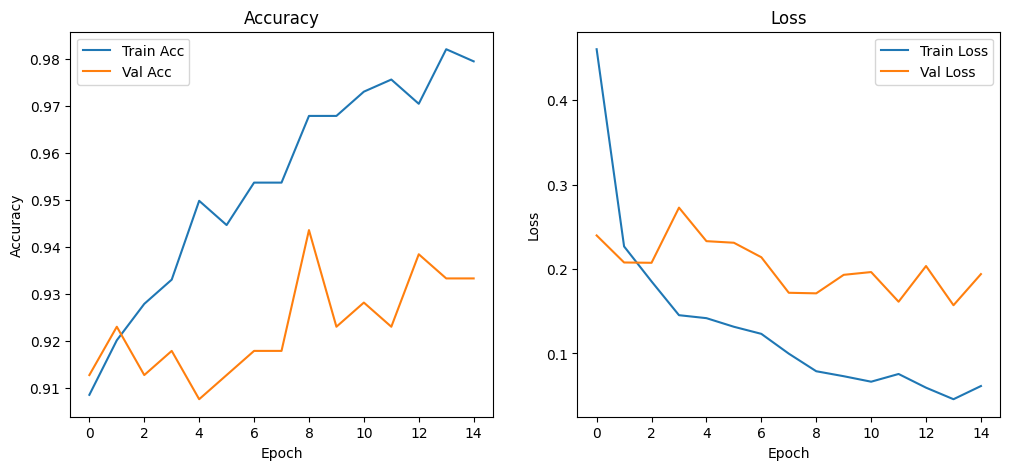

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 93.33%


In [20]:
model.save("forgery_detector.h5")
print("Model saved in H5 format successfully!")

Model saved in H5 format successfully!


In [21]:
from tensorflow.keras.models import load_model

loaded_model = load_model("forgery_detector.h5")


In [22]:
import numpy as np
import cv2

def predict_image(img_path, model):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    pred = model.predict(img)[0][0]

    if pred < 0.5:
        print(f"{img_path} → ORIGINAL ({1-pred:.2f} confidence)")
    else:
        print(f"{img_path} → FORGED ({pred:.2f} confidence)")

# Example usage:
predict_image("data/original/1_jpg.rf.9535ba2e4b1dbb8d878f82ff1ff50e23.jpg", model)
predict_image("data/forged/0_1_jpg.rf.260e5c23b16460307bcf26b5767d6715.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
data/original/1_jpg.rf.9535ba2e4b1dbb8d878f82ff1ff50e23.jpg → ORIGINAL (0.80 confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
data/forged/0_1_jpg.rf.260e5c23b16460307bcf26b5767d6715.jpg → FORGED (1.00 confidence)


In [23]:
import tensorflow as tf
print(tf.__version__)


2.20.0
